In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
from scipy.stats import norm

In [48]:
data_df = pd.read_csv('housing_price_dataset.csv')

In [49]:
data_df.head()

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626
2,1860,2,1,Suburb,1970,306891.012076
3,2294,2,1,Urban,1996,206786.787153
4,2130,5,2,Suburb,2001,272436.239065


In [50]:
data_df.shape

(50000, 6)

In [51]:
data_df.columns

Index(['SquareFeet', 'Bedrooms', 'Bathrooms', 'Neighborhood', 'YearBuilt',
       'Price'],
      dtype='object')

In [52]:
data_df.isnull().sum()

SquareFeet      0
Bedrooms        0
Bathrooms       0
Neighborhood    0
YearBuilt       0
Price           0
dtype: int64

In [53]:
data_df['Price'].describe()

count     50000.000000
mean     224827.325151
std       76141.842966
min      -36588.165397
25%      169955.860225
50%      225052.141166
75%      279373.630052
max      492195.259972
Name: Price, dtype: float64

In [54]:
price = data_df['Price']

In [55]:
price.mean()

224827.32515099045

In [56]:
price.median()

225052.14116600397

In [57]:
price.std()

76141.84296604691

In [58]:
price.var()

5797580250.266148

In [59]:
five_number_summary = np.quantile(price, [0, 0.25, 0.5, 0.75, 1])

In [60]:
min = five_number_summary[0]
min

-36588.16539749279

In [61]:
q1 = five_number_summary[1]
q1

169955.8602251014

In [62]:
q2 = five_number_summary[2]
q2

225052.14116600397

In [63]:
q3 = five_number_summary[3]
q3

279373.6300523317

In [64]:
iqr = q3 - q1
iqr

109417.76982723031

In [65]:
lower_bound = q1 - 1.5 * iqr
lower_bound

5829.205484255945

In [66]:
uppper_bound = q3 + 1.5 * iqr
uppper_bound

443500.28479317715

In [67]:
outliers = data_df[((data_df['Price']<lower_bound) | (data_df['Price']>uppper_bound))]


In [68]:
outliers

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
1266,1024,2,2,Urban,2006,-24715.242482
2310,1036,4,1,Suburb,1983,-7550.504574
2845,2999,5,2,Urban,1999,461502.014630
3285,2985,5,1,Rural,1961,456959.804367
3357,2928,3,3,Suburb,1962,457902.675442
3630,1235,3,2,Rural,2012,-19871.251146
3784,2901,2,3,Urban,1996,470989.679074
3967,2931,5,1,Rural,1983,453551.125469
4162,1352,5,2,Suburb,1977,-10608.359522
4537,1102,2,1,Suburb,1967,5796.058628


In [69]:
outliers['Price'].shape

(59,)

### Box plot for outliers

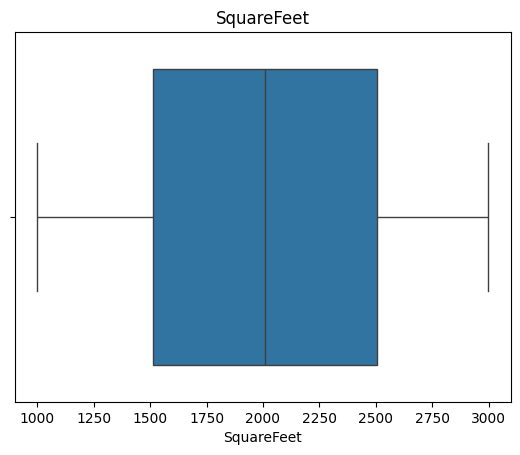

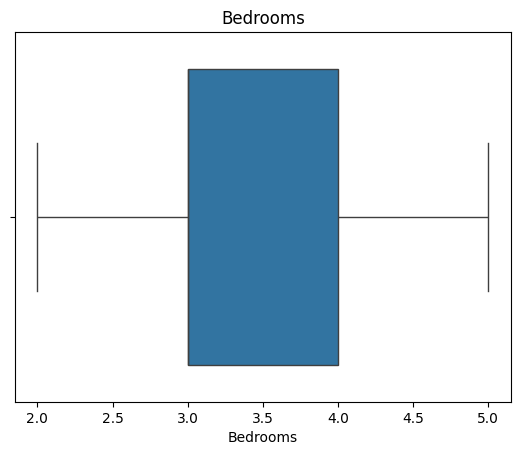

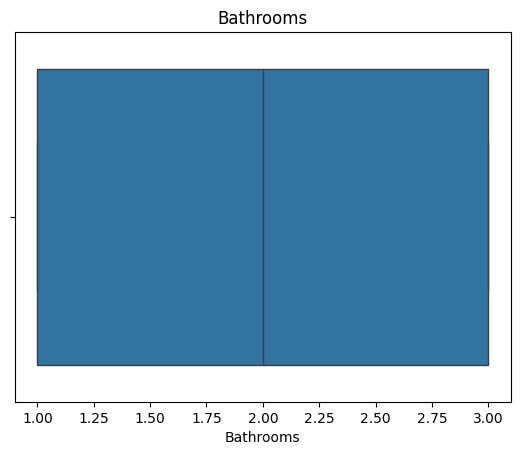

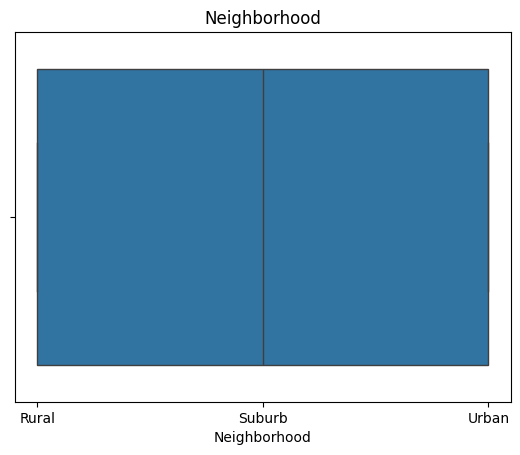

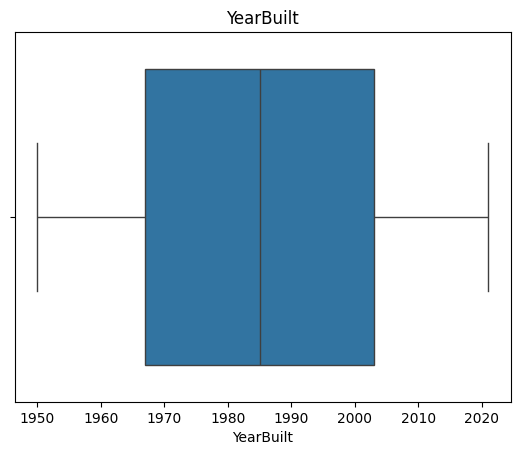

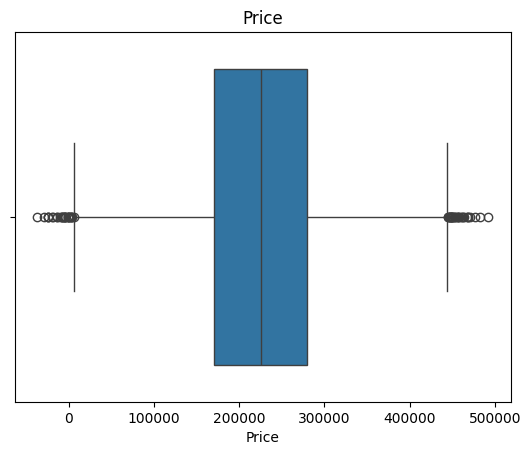

In [70]:
for col in data_df.columns:
    sns.boxplot(x=data_df[col])
    plt.title(col)
    plt.show()

In [71]:
data_df['Neighborhood'] = data_df['Neighborhood'].map({'Suburb': 1, 'Rural': 2, 'Urban': 3})

In [72]:
data_df

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,2,1969,215355.283618
1,2459,3,2,2,1980,195014.221626
2,1860,2,1,1,1970,306891.012076
3,2294,2,1,3,1996,206786.787153
4,2130,5,2,1,2001,272436.239065
...,...,...,...,...,...,...
49995,1282,5,3,2,1975,100080.865895
49996,2854,2,2,1,1988,374507.656727
49997,2979,5,3,1,1962,384110.555590
49998,2596,5,2,2,1984,380512.685957


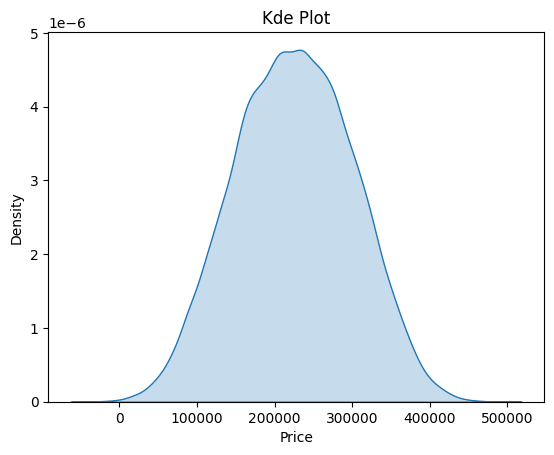

In [73]:
sns.kdeplot(data=data_df['Price'], fill=True)
plt.title("Kde Plot")
plt.xlabel("Price")
plt.show()

In [74]:
mu, std = norm.fit(data_df['Price'])

In [75]:
pri = np.sort(data_df['Price'])

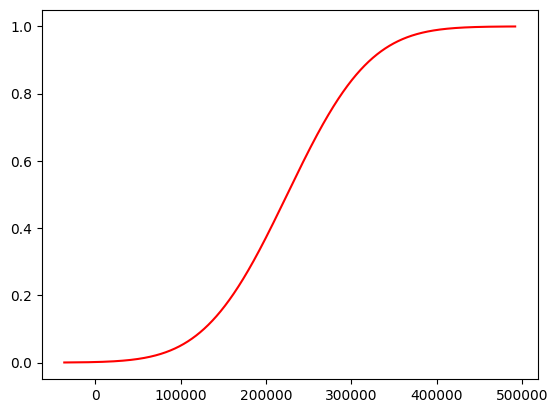

In [76]:
plt.plot(pri, st.norm.cdf(pri, mu, std), color='red')
plt.show()


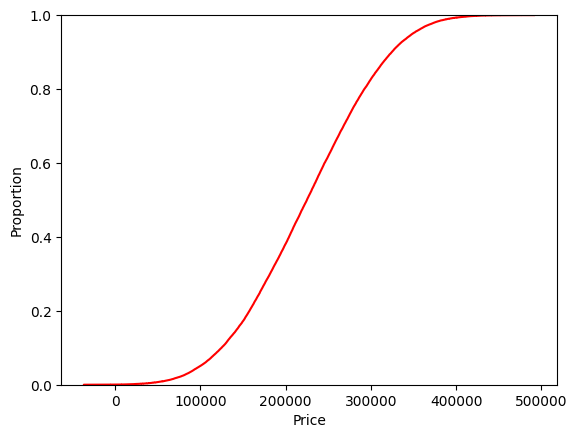

In [77]:
sns.ecdfplot(data_df['Price'], color='red')
plt.show()


<Axes: xlabel='Price', ylabel='SquareFeet'>

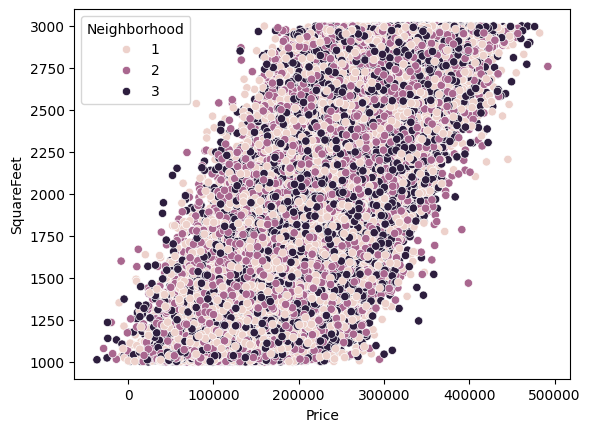

In [78]:
sns.scatterplot(data_df, x='Price', y='SquareFeet', hue='Neighborhood')

Text(0.5, 1.0, 'Correlation')

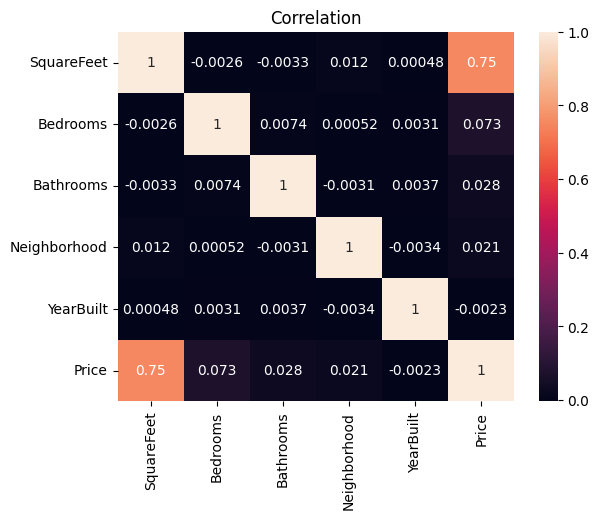

In [79]:
sns.heatmap(data_df.select_dtypes(include=['number']).corr(), annot=True)
plt.title("Correlation")

# Visualize before scaling

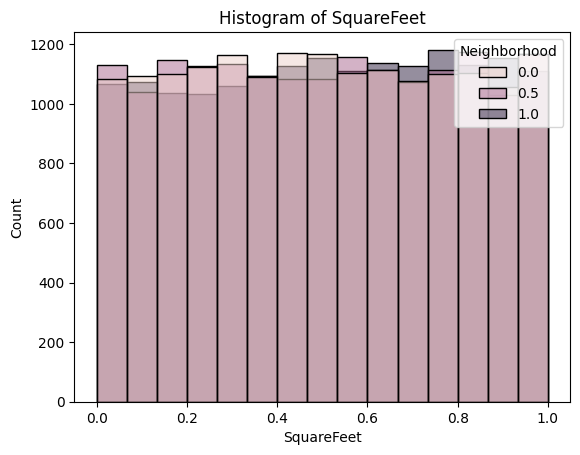

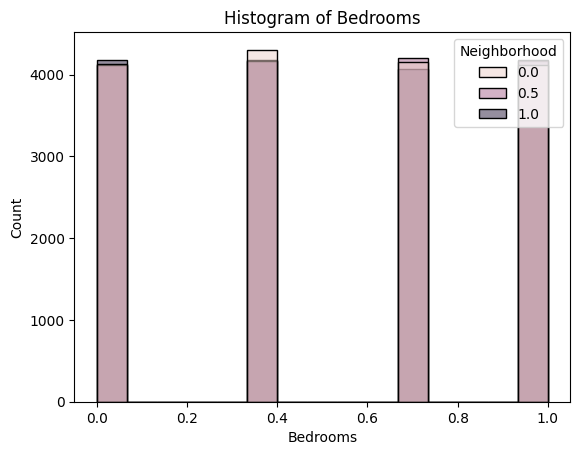

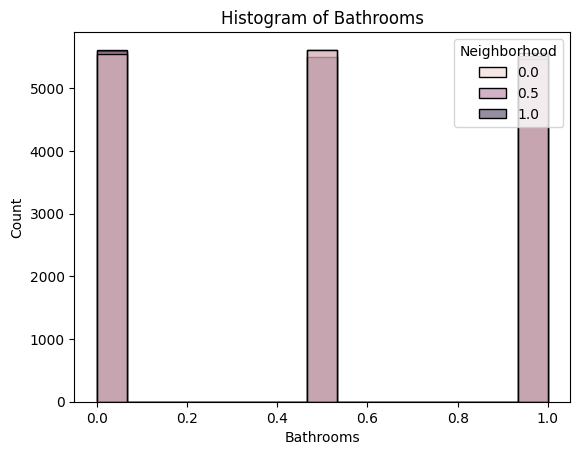

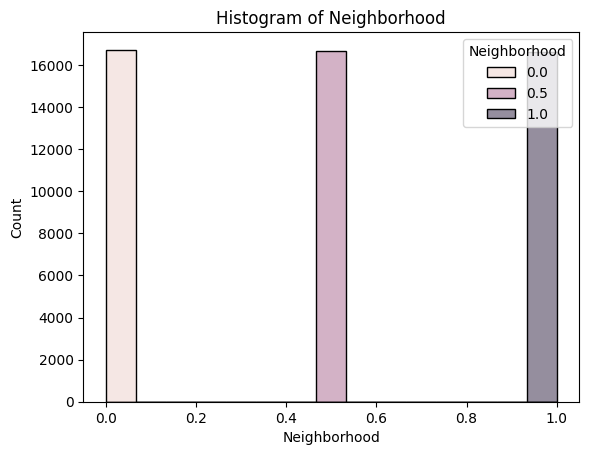

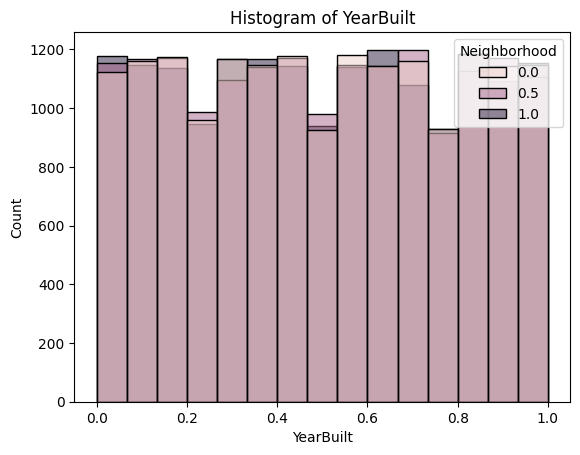

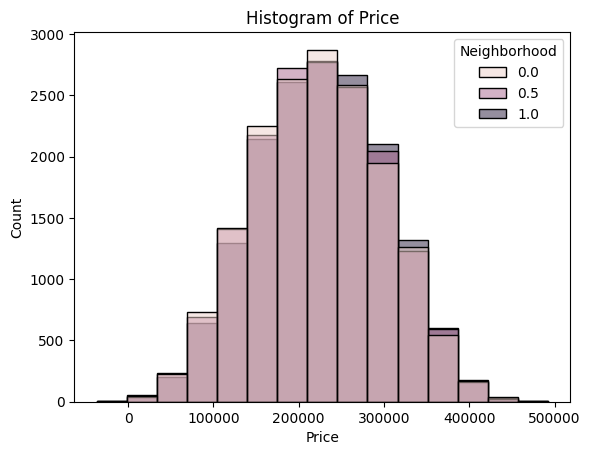

In [85]:
for col in data_df:
    sns.histplot(data_df, x=col, bins=15, hue='Neighborhood')
    plt.title(f"Histogram of {col}")
    plt.show()

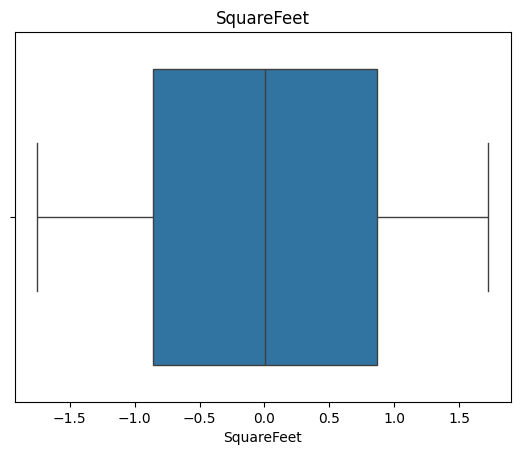

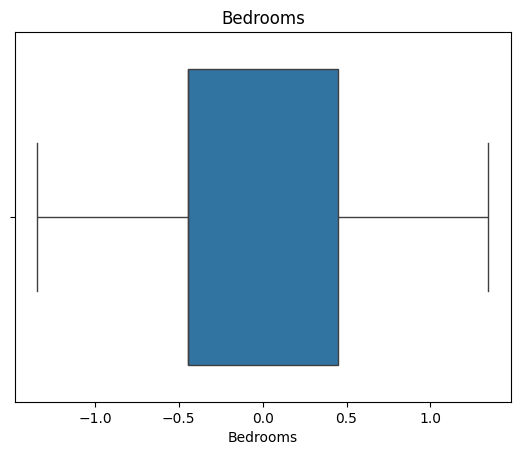

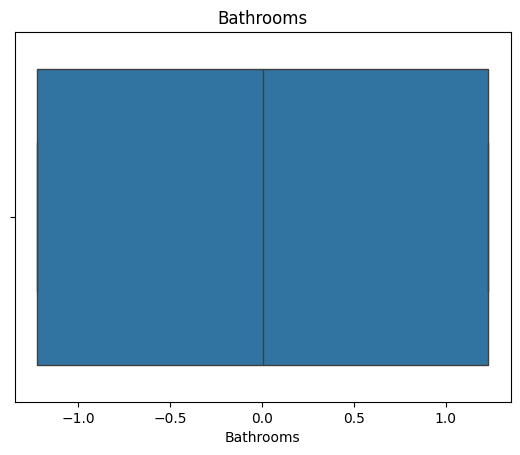

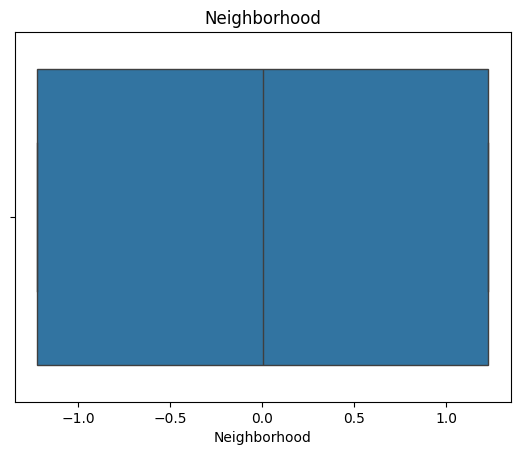

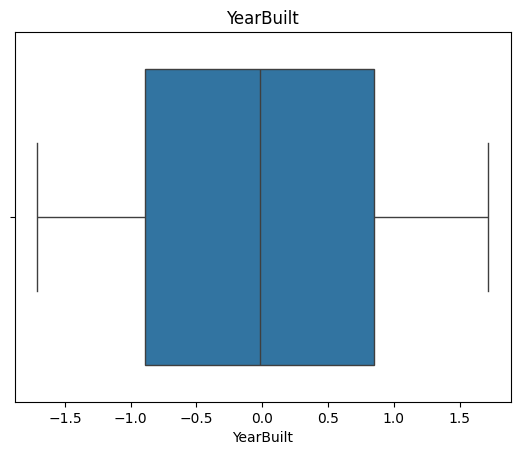

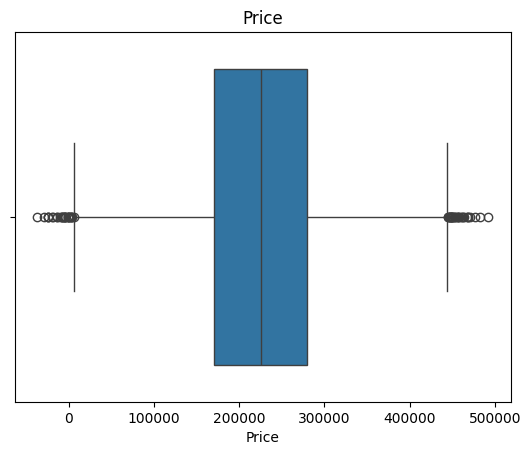

In [94]:
for col in data_df.columns:
    sns.boxplot(x=data_df[col])
    plt.title(col)
    plt.show()

Data Manipulation

𝑋 − 𝑋𝑚𝑖𝑛

_____________ = 𝑋𝑠𝑐𝑎𝑙𝑒𝑑  

𝑋𝑚𝑎𝑥− 𝑋𝑚𝑖𝑛

In [81]:
from sklearn.preprocessing import MinMaxScaler

scalar = MinMaxScaler()
numerical_df = data_df.select_dtypes(include=['number']).columns
numerical_df = numerical_df.drop('Price')

In [82]:
data_df[numerical_df] = scalar.fit_transform(data_df[numerical_df])

In [83]:
data_df

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,0.563282,0.666667,0.0,0.5,0.267606,215355.283618
1,0.729865,0.333333,0.5,0.5,0.422535,195014.221626
2,0.430215,0.000000,0.0,0.0,0.281690,306891.012076
3,0.647324,0.000000,0.0,1.0,0.647887,206786.787153
4,0.565283,1.000000,0.5,0.0,0.718310,272436.239065
...,...,...,...,...,...,...
49995,0.141071,1.000000,1.0,0.5,0.352113,100080.865895
49996,0.927464,0.000000,0.5,0.0,0.535211,374507.656727
49997,0.989995,1.000000,1.0,0.0,0.169014,384110.555590
49998,0.798399,1.000000,0.5,0.5,0.478873,380512.685957


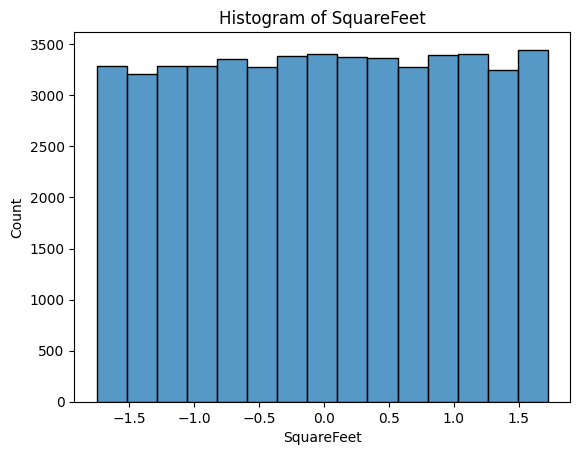

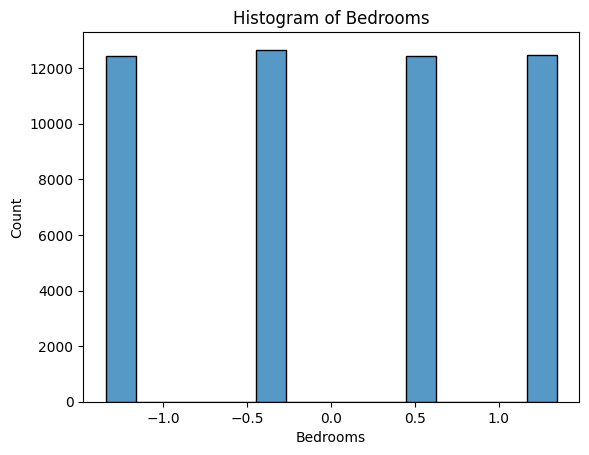

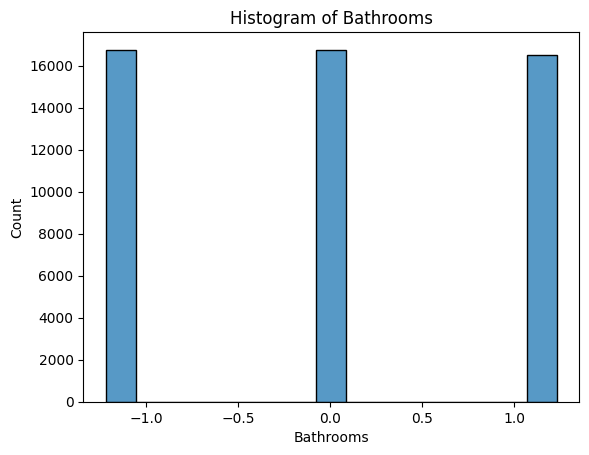

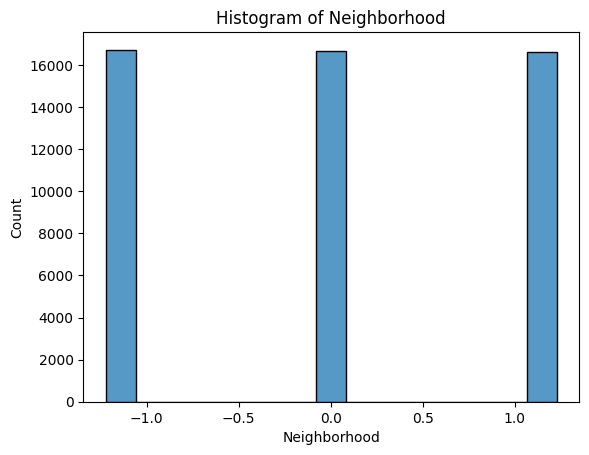

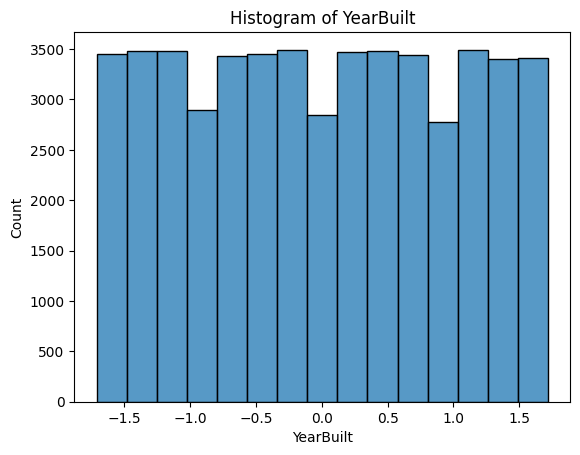

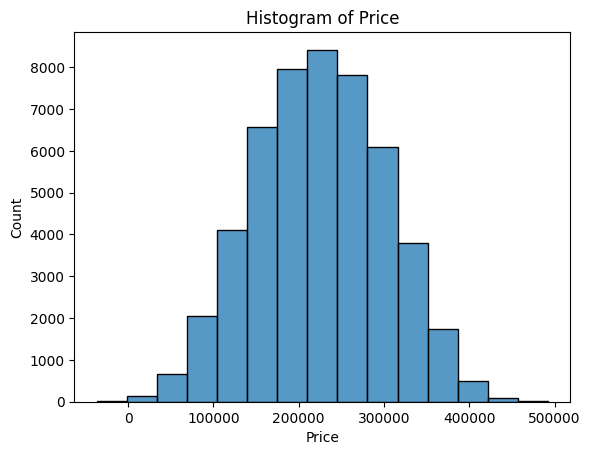

In [95]:
for col in data_df:
    sns.histplot(data_df, x=col, bins=15)
    plt.title(f"Histogram of {col}")
    plt.show()

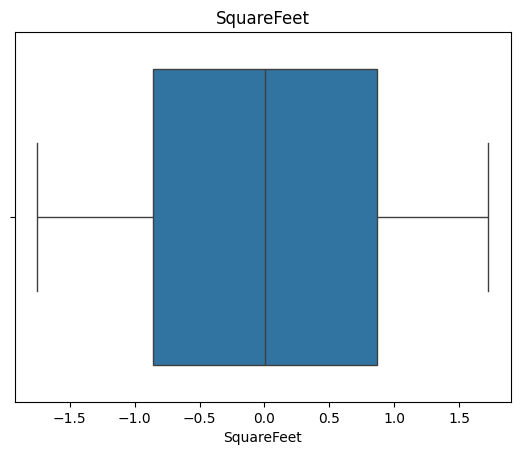

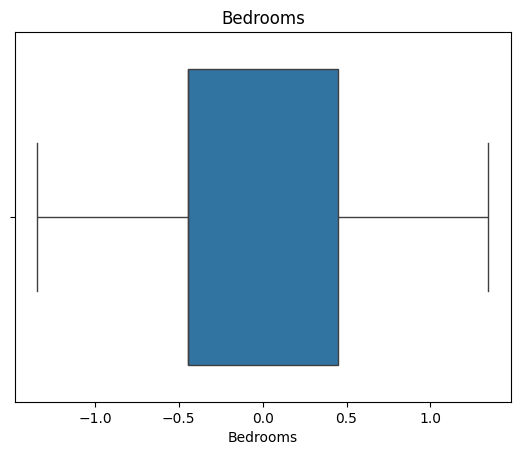

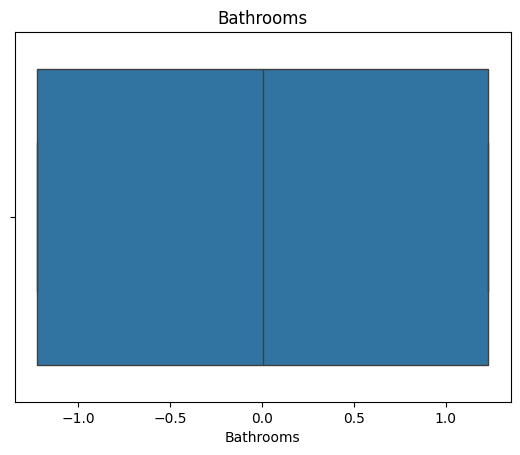

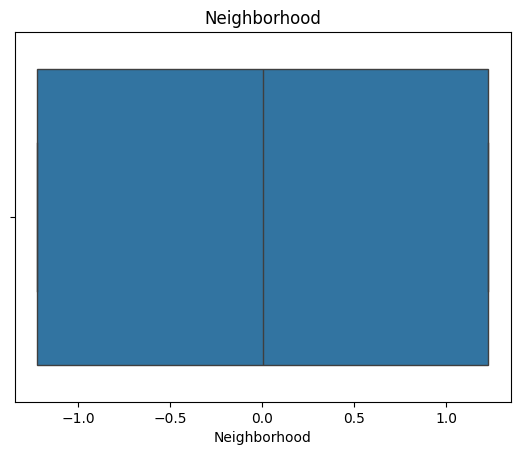

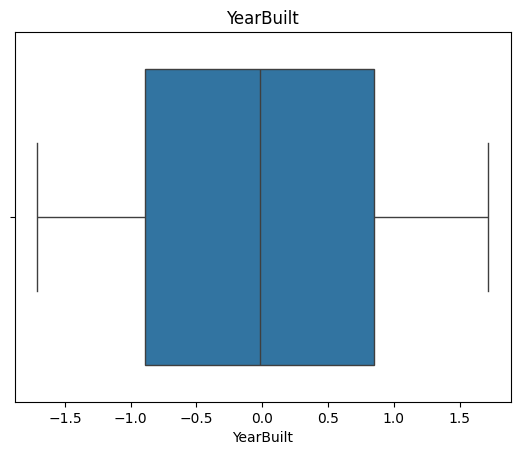

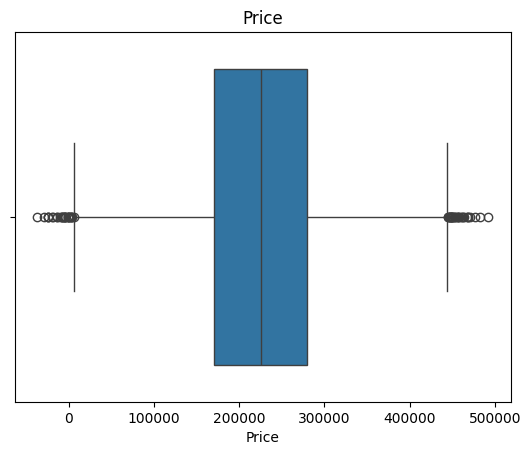

In [96]:
for col in data_df.columns:
    sns.boxplot(x=data_df[col])
    plt.title(col)
    plt.show()

In [87]:
from sklearn.preprocessing import StandardScaler

st_scaler = StandardScaler()

In [88]:
data_df[numerical_df] = st_scaler.fit_transform(data_df[numerical_df])

In [89]:
data_df

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,0.207861,0.449067,-1.220113,0.002891,-0.791751,215355.283618
1,0.786480,-0.446738,0.005614,0.002891,-0.260842,195014.221626
2,-0.254340,-1.342543,-1.220113,-1.222031,-0.743486,306891.012076
3,0.499777,-1.342543,-1.220113,1.227812,0.511390,206786.787153
4,0.214811,1.344872,0.005614,-1.222031,0.752713,272436.239065
...,...,...,...,...,...,...
49995,-1.258671,1.344872,1.231341,0.002891,-0.502164,100080.865895
49996,1.472831,-1.342543,0.005614,-1.222031,0.125274,374507.656727
49997,1.690031,1.344872,1.231341,-1.222031,-1.129602,384110.555590
49998,1.024531,1.344872,0.005614,0.002891,-0.067784,380512.685957


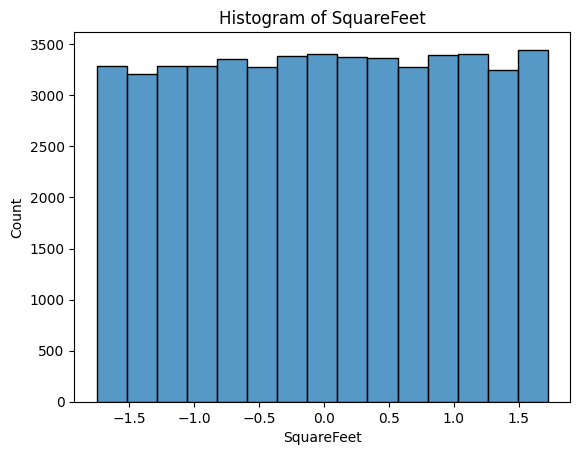

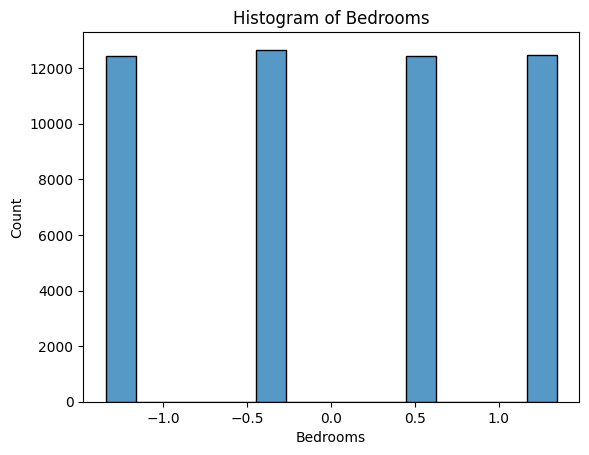

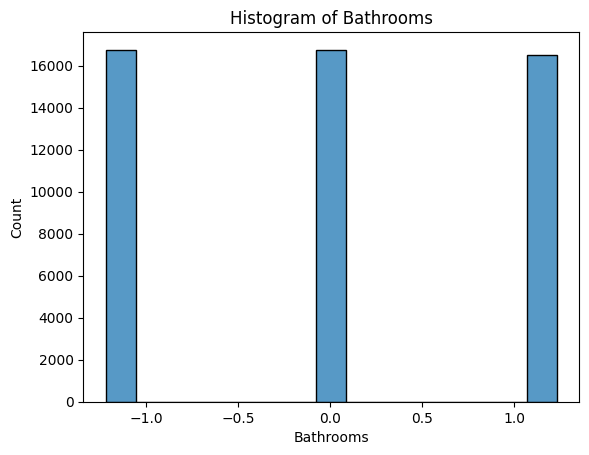

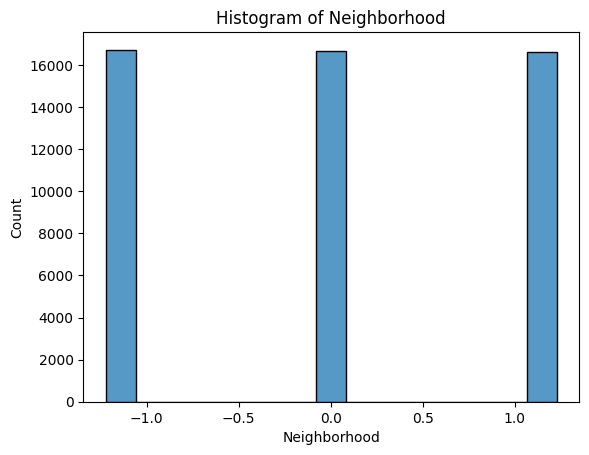

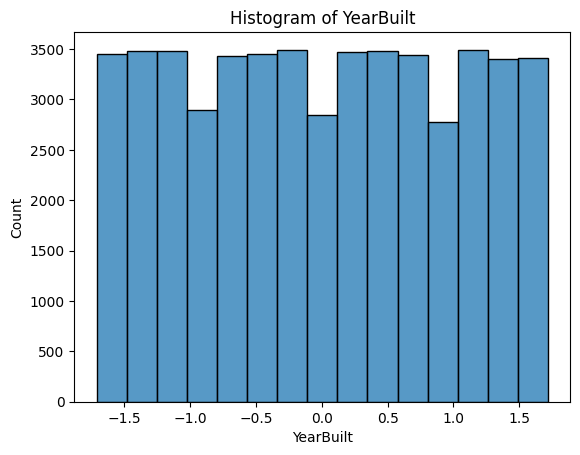

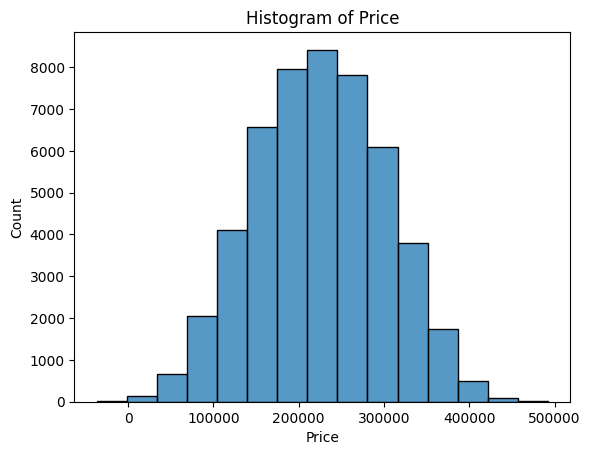

In [93]:
for col in data_df:
    figure = plt.subplot()
    sns.histplot(data_df, x=col, bins=15)
    plt.title(f"Histogram of {col}")
    plt.show()

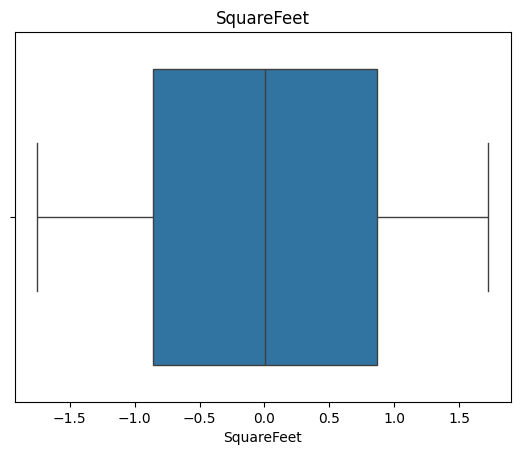

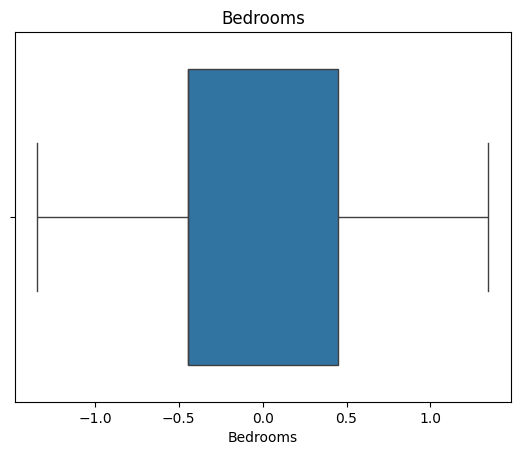

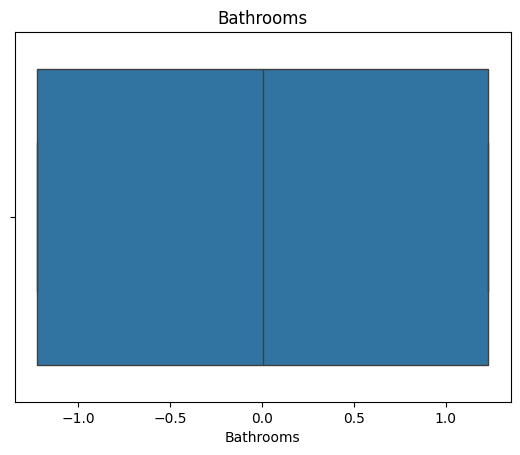

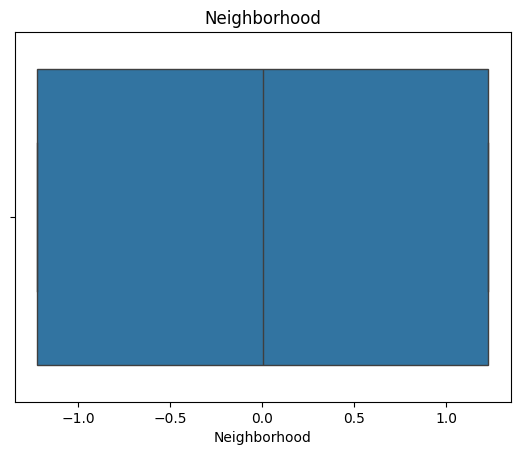

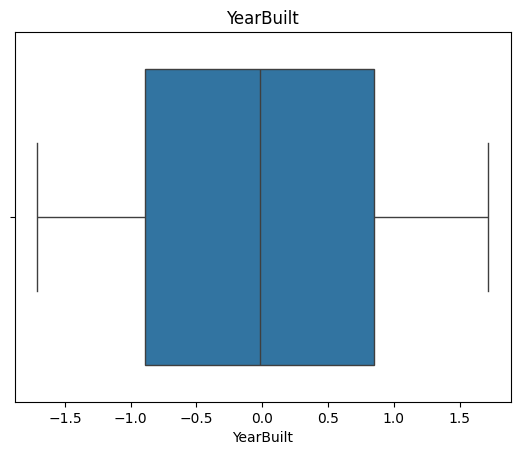

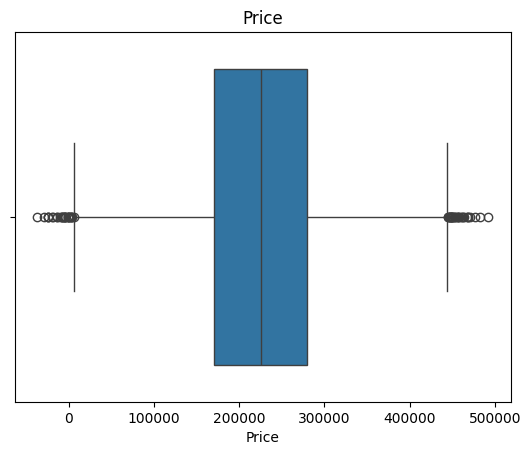

In [97]:
for col in data_df.columns:
    sns.boxplot(x=data_df[col])
    plt.title(col)
    plt.show()

In [98]:
from sklearn.preprocessing import RobustScaler

rs_scaler = RobustScaler()
data_df[numerical_df] = rs_scaler.fit_transform(data_df[numerical_df])

In [99]:
data_df

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,0.119839,1.0,-0.5,0.0,-0.444444,215355.283618
1,0.455186,0.0,0.0,0.0,-0.138889,195014.221626
2,-0.148036,-1.0,-0.5,-0.5,-0.416667,306891.012076
3,0.289023,-1.0,-0.5,0.5,0.305556,206786.787153
4,0.123867,2.0,0.0,-0.5,0.444444,272436.239065
...,...,...,...,...,...,...
49995,-0.730111,2.0,0.5,0.0,-0.277778,100080.865895
49996,0.852971,-1.0,0.0,-0.5,0.083333,374507.656727
49997,0.978852,2.0,0.5,-0.5,-0.638889,384110.555590
49998,0.593152,2.0,0.0,0.0,-0.027778,380512.685957


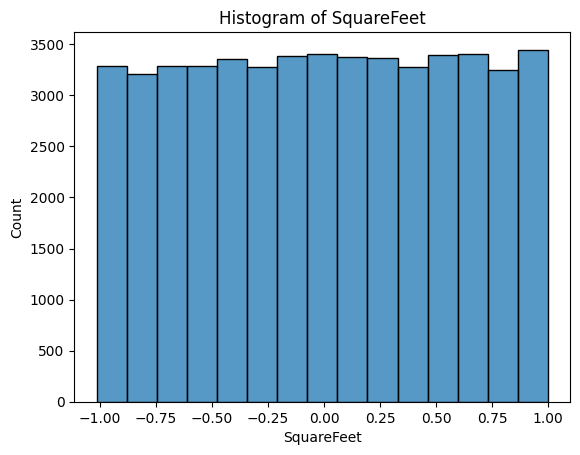

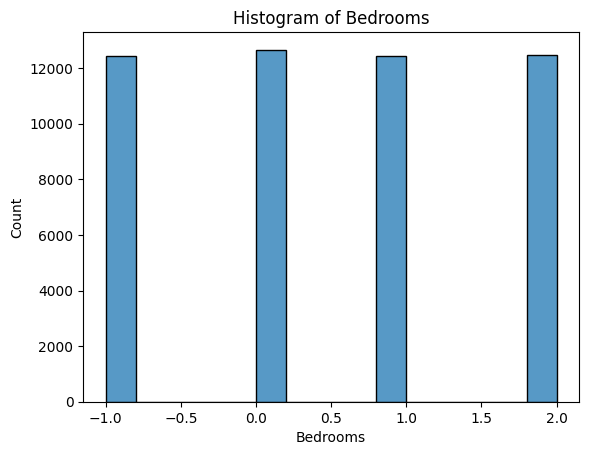

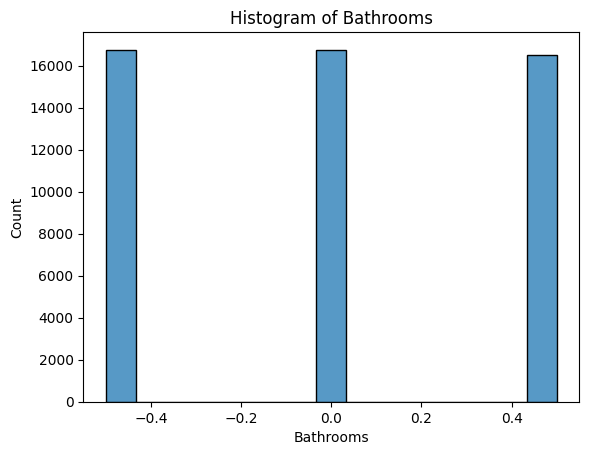

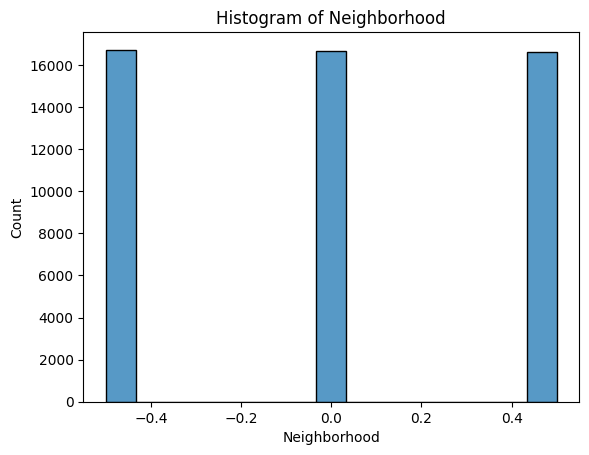

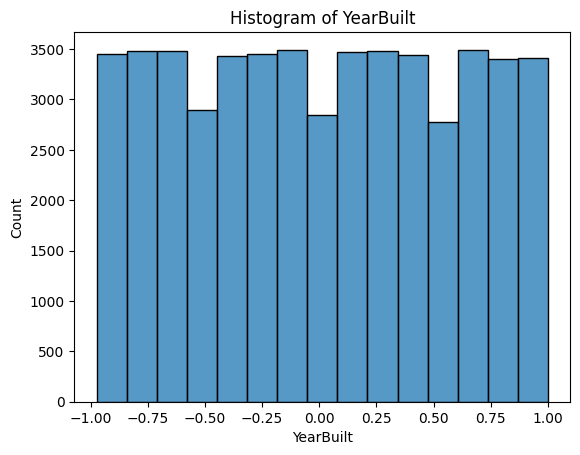

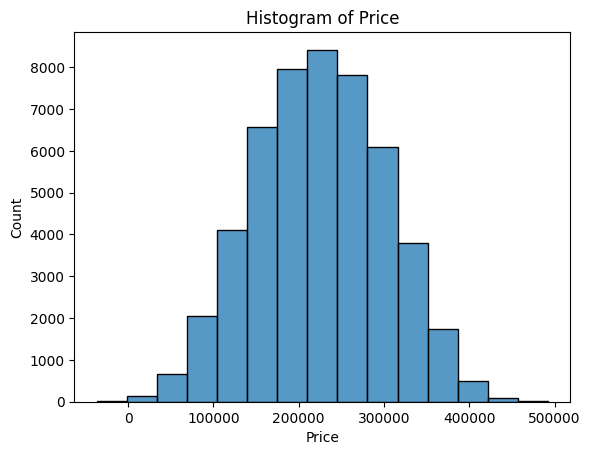

In [100]:
for col in data_df:
    figure = plt.subplot()
    sns.histplot(data_df, x=col, bins=15)
    plt.title(f"Histogram of {col}")
    plt.show()

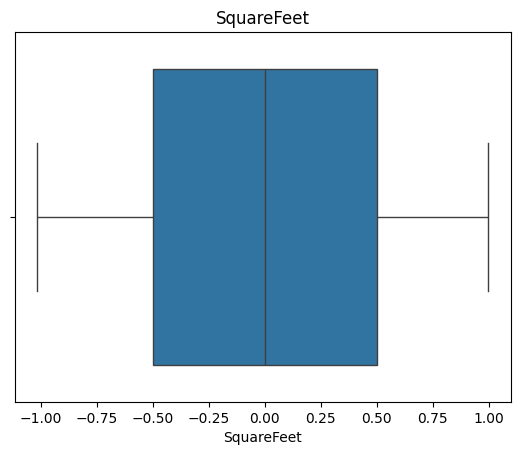

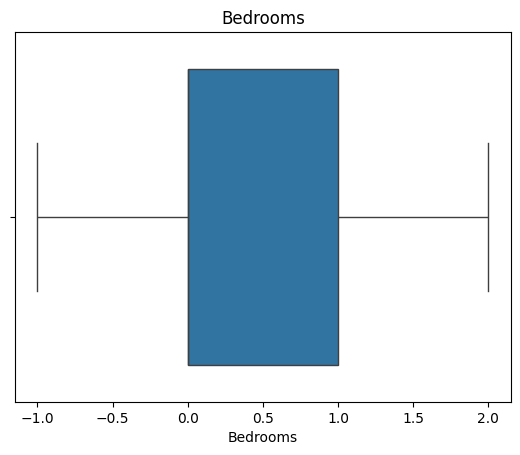

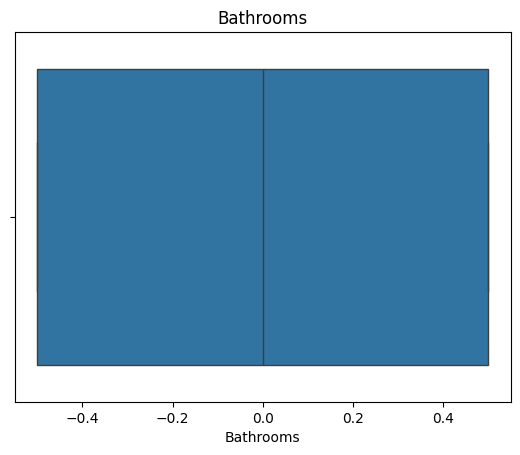

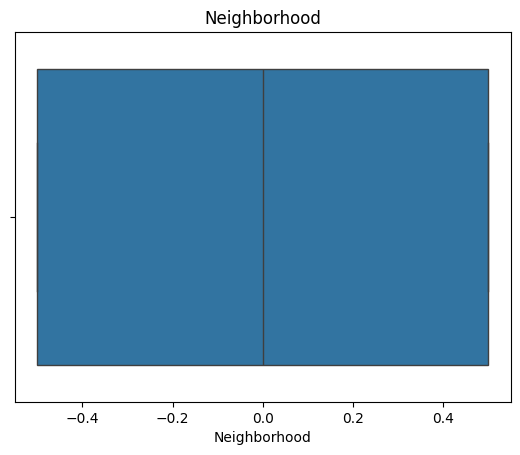

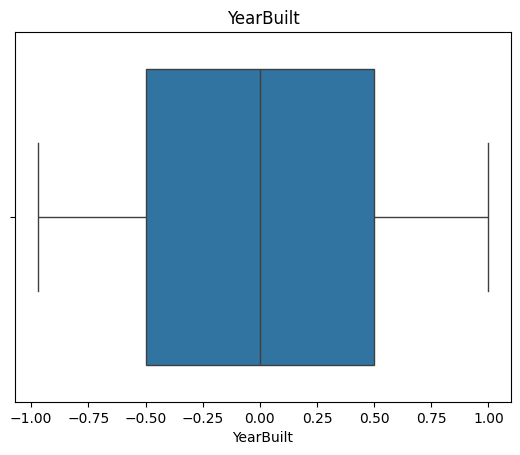

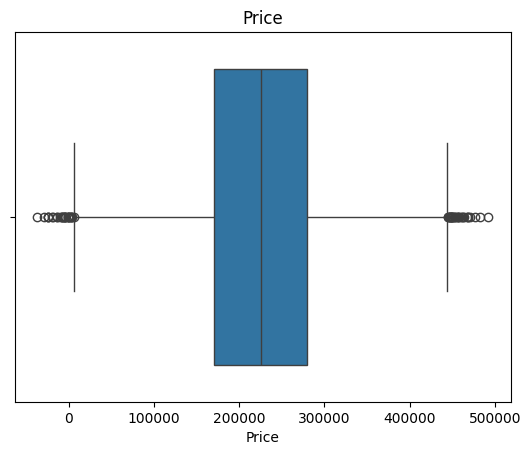

In [101]:
for col in data_df.columns:
    sns.boxplot(x=data_df[col])
    plt.title(col)
    plt.show()